##Hypothesis Testing
After descriptive statistics are understood and visualised metric by metric, the hypothesis can be tested. Our hypothesis was:

Null Hypothesis (H0): There is no statistically significant correlation between the rising popularity of Street Culture metrics and the prevalence of Youth Risk Indices (Crime/NEET/Health) in the UK, France, and Germany over the analysis period.

Alternative Hypothesis (H1): There is a statistically significant positive linear correlation (with potential lag effects) between the rising popularity of Street Culture metrics and the prevalence of Youth Risk Indices, even when controlling for socioeconomic factors.

  HYPOTHESIS TEST RESULTS: UK

>> Significant Correlations (P < 0.05) in UK:

Culture Metric       Risk Metric           Correlation (r)      Verdict             
   Rap Market Share  Violent Crime (Count)  0.7795              SIGNIFICANT         
Streetwear Interest  Violent Crime (Count)  0.6672              SIGNIFICANT         
     Drill Interest      School Exclusions  0.6439              SIGNIFICANT         
   Rap Market Share      School Exclusions  0.6136              SIGNIFICANT         
     Drill Interest  Violent Crime (Count)  0.5640              SIGNIFICANT         
Streetwear Interest      School Exclusions  0.5044              SIGNIFICANT         

------------------------------------------------------------



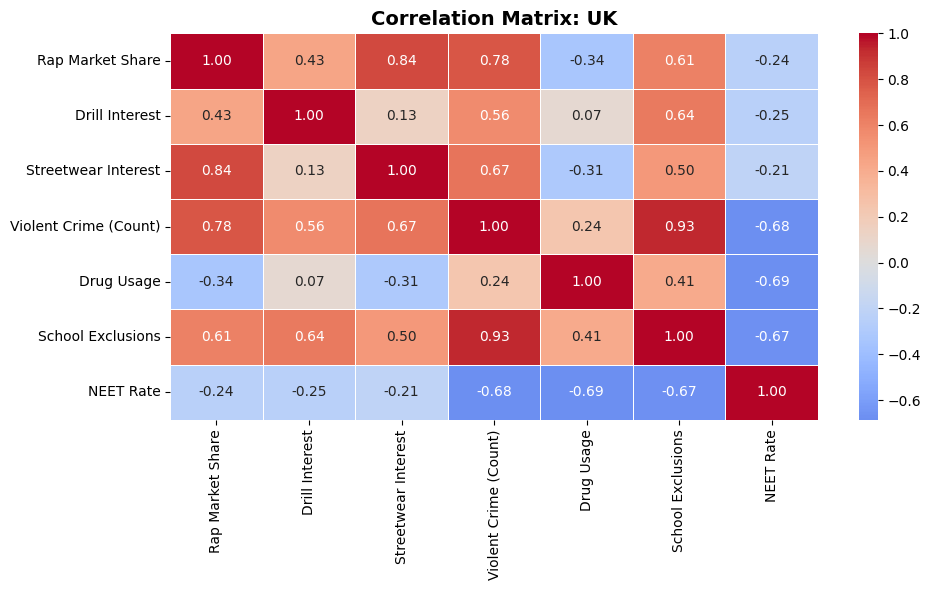

  HYPOTHESIS TEST RESULTS: FRANCE

>> Significant Correlations (P < 0.05) in France:

Culture Metric       Risk Metric          Correlation (r)      Verdict             
   Rap Market Share  Crime Rate (Rate)     0.7620              SIGNIFICANT         
Streetwear Interest          NEET Rate    -0.6716              SIGNIFICANT         
     Drill Interest  Crime Rate (Rate)    -0.7028              SIGNIFICANT         

------------------------------------------------------------



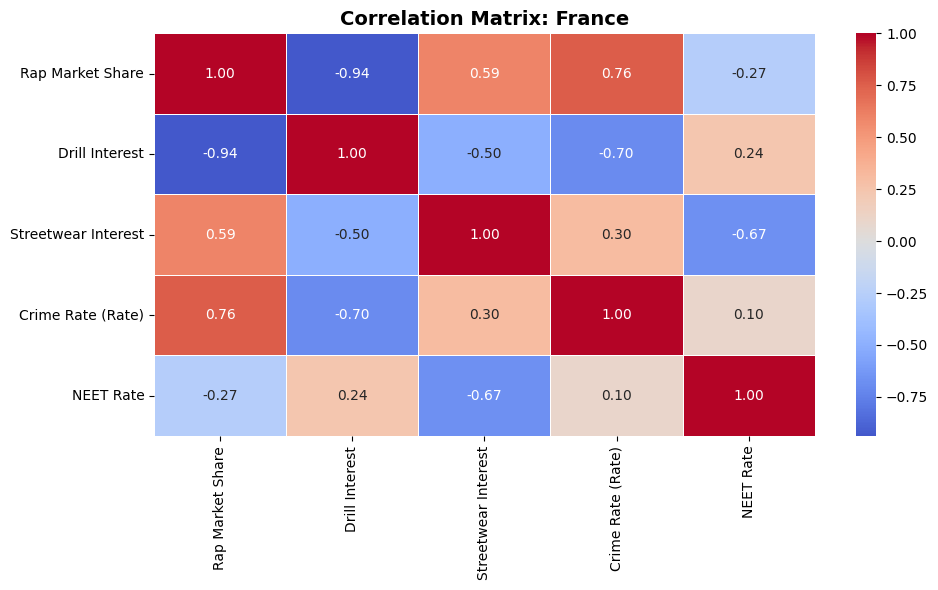

  HYPOTHESIS TEST RESULTS: GERMANY

>> Significant Correlations (P < 0.05) in Germany:

Culture Metric       Risk Metric          Correlation (r)      Verdict             
  Drill Interest     Crime Rate (Rate)    -0.8205              SIGNIFICANT         
  Drill Interest             NEET Rate    -0.8488              SIGNIFICANT         
Rap Market Share     Crime Rate (Rate)    -0.8903              SIGNIFICANT         
Rap Market Share             NEET Rate    -0.8989              SIGNIFICANT         

------------------------------------------------------------



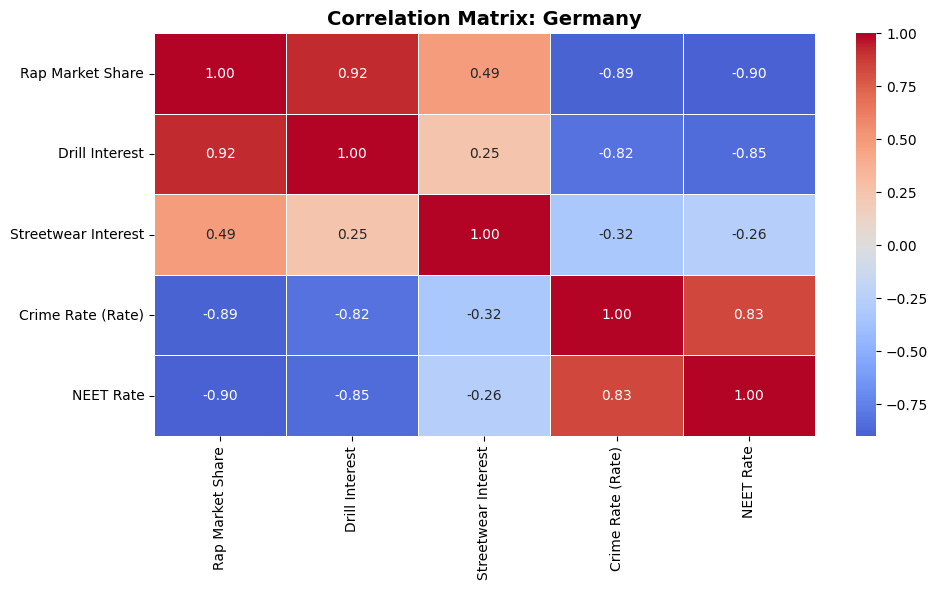

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. LOAD DATA
df = pd.read_csv('final_panel_dataset.csv')



# We separate variables to test specific relationships (Culture vs Risk)
culture_vars = ['Rap_Market_Share', 'music_drill', 'fashion_streetwear']
risk_vars = ['Violent_Crime_Count', 'Crime_Rate_Eurostat', 'Drug_Prevalence_Pct', 'School_Exclusions', 'NEET_Rate']

# Professional Labels for Output
label_map = {
    'Rap_Market_Share': 'Rap Market Share',
    'music_drill': 'Drill Interest',
    'fashion_streetwear': 'Streetwear Interest',
    'Violent_Crime_Count': 'Violent Crime (Count)',
    'Crime_Rate_Eurostat': 'Crime Rate (Rate)',
    'Drug_Prevalence_Pct': 'Drug Usage',
    'School_Exclusions': 'School Exclusions',
    'NEET_Rate': 'NEET Rate'
}

# Helper function to check if a column is valid
def is_valid(series):
    return series.notna().any() and (series != 0).any() and series.nunique() > 1


# HYPOTHESIS TESTING LOOP
countries = ['UK', 'France', 'Germany']

for country in countries:
    print(f"{'='*60}")
    print(f"  HYPOTHESIS TEST RESULTS: {country.upper()}")
    print(f"{'='*60}")

    # Filter Data
    subset = df[df['Country'] == country].copy()

    # Identify valid columns for this country
    valid_culture = [c for c in culture_vars if c in subset.columns and is_valid(subset[c])]
    valid_risk = [c for c in risk_vars if c in subset.columns and is_valid(subset[c])]

    if not valid_culture or not valid_risk:
        print(f"   [!] Insufficient data for full analysis in {country}.\n")
        continue

    # Store results
    results = []

    # Test every Culture Variable against every Risk Variable
    for cult in valid_culture:
        for risk in valid_risk:
            # Calculate Correlation
            r, p = pearsonr(subset[cult], subset[risk])

            # Judgment
            significance = "SIGNIFICANT" if p < 0.05 else "Not Sig"

            # Add to list
            results.append({
                'Culture Metric': label_map.get(cult, cult),
                'Risk Metric': label_map.get(risk, risk),
                'Correlation (r)': r,
                'P-Value': p,
                'Verdict': significance
            })

    # Convert to DataFrame
    res_df = pd.DataFrame(results)

    # Filter for Significant Results & Sort
    sig_results = res_df[res_df['P-Value'] < 0.05].sort_values('Correlation (r)', ascending=False)

    # --- PRINT OUTPUT WITH FIXED INDENTATION ---
    print(f"\n>> Significant Correlations (P < 0.05) in {country}:\n")

    if not sig_results.empty:
        # We use formatters to ensure the columns align perfectly
        print(sig_results[['Culture Metric', 'Risk Metric', 'Correlation (r)', 'Verdict']].to_string(
            index=False,
            col_space=20,
            justify='left',
            formatters={
                'Correlation (r)': '{: .4f}'.format,
                'P-Value': '{:.4e}'.format
            }
        ))
    else:
        print("   No statistically significant correlations found.")

    print("\n" + "-"*60 + "\n")

    # --- HEATMAP FOR REPORT ---
    plt.figure(figsize=(10, 6))
    cols_to_plot = valid_culture + valid_risk
    # Rename columns for the plot
    subset_plot = subset[cols_to_plot].rename(columns=label_map)

    corr_matrix = subset_plot.corr()

    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
    plt.title(f'Correlation Matrix: {country}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

Here final results of the hypothesis testing is provided, as it is stated since p-value is significant, we will reject H0.

In [9]:
import pandas as pd
from scipy.stats import pearsonr

# Load Data
df = pd.read_csv('final_panel_dataset.csv')


# HYPOTHESIS TESTING FRAMEWORK

# Null Hypothesis (H0): No correlation between Street Culture and Youth Risk.
# Alt Hypothesis (H1): Significant positive correlation exists.
# We use Pearson Correlation (r) for strength and P-Value for significance.


variables_to_test = [
    ('Rap_Market_Share', 'Violent_Crime_Count'), # Economic vs Crime
    ('music_drill', 'Violent_Crime_Count'),      # Digital vs Crime
    ('Rap_Market_Share', 'School_Exclusions')    # Economic vs Social
]

print("=== HYPOTHESIS TEST RESULTS (UK) ===")
uk_data = df[df['Country'] == 'UK']

for culture_var, risk_var in variables_to_test:
    if culture_var in uk_data.columns and risk_var in uk_data.columns:
        # Calculate Stats
        r, p_value = pearsonr(uk_data[culture_var], uk_data[risk_var])

        # Interpret Results
        significance = "SIGNIFICANT (Reject H0)" if p_value < 0.05 else "Not Significant"

        print(f"\nTesting: {culture_var} vs. {risk_var}")
        print(f"   Correlation (r): {r:.4f}")
        print(f"   P-Value:         {p_value:.4e}")
        print(f"   Result:          {significance}")

=== HYPOTHESIS TEST RESULTS (UK) ===

Testing: Rap_Market_Share vs. Violent_Crime_Count
   Correlation (r): 0.7795
   P-Value:         3.1112e-05
   Result:          SIGNIFICANT (Reject H0)

Testing: music_drill vs. Violent_Crime_Count
   Correlation (r): 0.5640
   P-Value:         7.7421e-03
   Result:          SIGNIFICANT (Reject H0)

Testing: Rap_Market_Share vs. School_Exclusions
   Correlation (r): 0.6136
   P-Value:         3.0915e-03
   Result:          SIGNIFICANT (Reject H0)
